In [ ]:
%matplotlib inline

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [132]:
import warnings
import os
import pandas as pd
import numpy as np
from datetime import timedelta
from ggplot import *
#import ggplot

from plotly.graph_objs import Bar, Scatter, Figure, Layout

import plotly.plotly as py
import plotly.graph_objs as go


warnings.filterwarnings('ignore')

##############################################################
# Let's load the data

# All Invoicing data (2013-01-01 - 2015-01-01) DTN Destination Travel Network
data = pd.read_csv('onsite_ad_analysis/all_advertisers_v2.csv')
# All bookingcom data (2015-01-01 - 2016-08-31) Bookings from our site
files = os.listdir('onsite_ad_analysis')
booking_files = [f for f in files if 'booking' in f]
booking_frames = []
for f in booking_files:
    directory = 'onsite_ad_analysis'
    path = os.path.join(directory, f) 
    temp = pd.read_csv(path)
    booking_frames.append(temp)

booking_data = pd.concat(booking_frames)


# Ad Performance data 
ad_data = pd.read_csv('onsite_ad_analysis/ad_performance.csv')


##############################################################
# Let's format the DTN data

data = data.rename(
        columns={
        "Desc" : "advertiser_name"
    })

# Format Dates
data['Date'] = pd.to_datetime(data['Month-Year'])
data['Date'] = data['Date']



# Clean Descriptions (member names)
data['advertiser_name'] = data['advertiser_name'].str.replace(' - Monterey','')

data['advertiser_name'] = data['advertiser_name'].str.replace(' - April','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - May','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - June','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - July','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - August','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - September','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - October','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - November','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - December','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - January','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - February','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' - March','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -April','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -May','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -June','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -July','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -August','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -September','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -October','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -November','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -December','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -January','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -February','')
data['advertiser_name'] = data['advertiser_name'].str.replace(' -March','')

# Format new column for month-year. Readability

data['Month-Year'] = data['Date'].apply(lambda x: str(x.month) + "-" + str(x.year))
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year']  = data['Date'].apply(lambda x: x.year)
data['Amount'] = data['Amount'].str.replace(' ', '')
data['Amount'] = data['Amount'].str.replace(',', '')
data['Amount'] = data['Amount'].apply(float)



##############################################################
# Let's format the Booking data

#Rename Columns
booking_data = booking_data.rename(
        columns={
        "book nr." : "book_nr",
        "booked"  : "booked",
        "arrival" : "arrival",
        "departure" : "departure",
        "comission_eur" : "comission_eur",
        "perc" : "fee_eur",
        "total transaction value ( EUR )" : "total_trans_value_eur",
        "slip nr." : "slip_nr",
        "affiliate id" : "affiliate_id",
        "hotel name" : "hotel_name",
        "accomodation type" : "accomodation_type",
        "hotel city" : "hotel_city",
        "hotel ufi" : "hotel_ufi"
    })


#Subset Columns needed
booking_data_v2 = booking_data[['booked',
                                'arrival',
                                'departure',
                                'total_trans_value_eur',
                                'hotel_name',
                                'hotel_city',
                                'accomodation_type']]


booking_data_v2['booked'] = pd.to_datetime(booking_data_v2['booked'])
booking_data_v2['arrival'] = pd.to_datetime(booking_data_v2['arrival'])
booking_data_v2['departure'] = pd.to_datetime(booking_data_v2['departure'])


data_v1 = data[data['Date'] < '2016-08-31']
data_v1 = data_v1[['advertiser_name','Amount','Month-Year','Month','Year','Date']]


##############################################################
# Let's transform the DTN data for visualization & modeling

## Top Spenders
ts = data_v1.groupby(['advertiser_name','Year'])
ts = ts['Amount'].sum()
ts = ts.reset_index()
ts = ts.sort(['Year','Amount'], ascending = False)
grouped = ts.groupby('Year')['Amount'].nlargest(3)
ts = ts.reset_index()
grouped_v2 = grouped.reset_index()
index = grouped_v2['level_1']
ts_v2 = ts[ts['index'].isin(index)]
ts_v3 = ts_v2[['advertiser_name', 'Year', 'Amount']]
ts_v3 = ts_v3.rename(columns={'advertiser_name': 'Member', 'Amount':'Spent'})
ts_v3

## Average Participating Member Contract Length Over Time
ct = data_v1.groupby(['Year'])
ct = ct['Month'].aggregate(len)
ct = ct.reset_index()
ct_v2 = ct.groupby(['Year'])['Month'].aggregate(np.mean)
ct_v2 = ct_v2.reset_index()
ct_v2['Year'] = ct_v2['Year'].apply(str)

## Revenue by Year
yr_revenue = data_v1.groupby(['Year'])['Amount'].aggregate(sum)
yr_revenue = yr_revenue.reset_index()
yr_revenue['Year'] = pd.to_datetime(yr_revenue['Year'], format = '%Y')
#yr_revenue['Year'] = yr_revenue['Year'].apply(lambda x: x.year)


# Revenue Over Month
revenue = data_v1.groupby(['Month-Year'])#.aggregate(sum)
revenue = revenue[['Amount']].aggregate(sum)
revenue = revenue.reset_index()
revenue['Month-Year'] = pd.to_datetime(revenue['Month-Year'])
revenue = revenue.sort('Month-Year')

# So far we haven't touched the Gross Amounts. We know need to account for the fact that the 
# CVB only gets 40% of the Gross Amount. 
revenue['MCCVB Amount'] = revenue['Amount']*.4

#Cumulative Revenue
revenue['Cumulative Revenue'] = revenue['Amount'].cumsum()
revenue['Cumulative MCCVB Revenue'] = revenue['MCCVB Amount'].cumsum()
revenue['Date'] = pd.to_datetime(revenue['Month-Year'])


# Revenue by year

unique_data = data_v1.drop_duplicates('advertiser_name')
# Unique Participants over Time
users = data_v1.groupby(['Date','advertiser_name']).aggregate(len)
users = users.reset_index()
# Aggregate Monthly
users_v2 = users.groupby(['Date']).aggregate(len)
users_v2 = users_v2.reset_index()
users_v2 = users_v2[['Date','Amount']]
users_v2 = users_v2.rename(columns={"Amount":"Unique Members"})
users_v2['Date'] = pd.to_datetime(users_v2['Date'])
users_v2['Month-Year'] = users_v2['Date'].apply(lambda x: str(x.month) + "-" + str(x.year))
users_v2['Month-Year'] = pd.to_datetime(users_v2['Month-Year'])
# Aggregate Yearly
users_year = unique_data.groupby(['advertiser_name','Year']).aggregate(len)
users_year = users_year.reset_index()
users_year_v2 = users_year.groupby(['Year']).aggregate(sum)
users_year_v2 = users_year_v2.reset_index()
users_year_v2 = users_year_v2.rename(columns={"Amount":"Unique Members"})


# Revenue and Participants over Time
full_u_r = pd.merge(users_v2, revenue, on = ['Date','Month-Year'])
full_u_r['Cost-Per-Member'] = full_u_r['Amount']/full_u_r['Unique Members']

# Revenue and Participants Yearly
full_u_r_v2 = full_u_r
full_u_r_v2['Date'] = pd.to_datetime(full_u_r_v2['Date'])
full_u_r_v2['Year'] = users_v2['Date'].apply(lambda x: str(x.year))
full_u_r_v3 = full_u_r_v2.groupby(['Year']).aggregate(sum)
full_u_r_v3 = full_u_r_v3.reset_index()


# Retention Rates, Who stayed and who bailed



# Loyalty - Avg Contract Lengths

# Introduction


The Monterey County Convention & Visitors Bureau has a number of benefits for members. In early 2013 they expanded their offering, in addition to basic online advertising included with membership, the Monterey County Convention & Visitors Bureau (MCCVB) provides a media kit for supplemental online advertising. This kit offers a number of solutions aimed at different types of exposure. All of these solutions cost less than \$300 per month and start at \$50 per month.

Seemonterey.com is a substantial source of online traffic and therefore impressions and engagement, averaging 1.6 million new users every year and boasting over 400,000 pageviews per month. The quality of the traffic is also worth noting with online visitors staying onsite longer and consuming our member's listings which have been viewed 250,000 times year to date. In addition to our impressions, our member websites have received 100,000 click throughs from seemonterey.com year to date.

This advertisement, while beneficial to our members, is being re-considered objectively in terms of its monetization. The following briefly summarizes the current state of our relationship with Destination Travel Network, our members usage of this program, and what other DMOs are doing. Finally we summarize our thoughts in terms of three stakeholder points of view.


## Context - Revenue

Destination Travel Network (DTN) is our partner who provides the ability and support for members to advertise on the website. Since the inception of the media kit and the partnership with DTN through August of 2016, the program has brought in approximately \$104,692 directly from members. This represents the total amount spent by members for additional advertising online. The MCCVB has brought in \$41,876 with the rest allocated towards DTN. The current monthly average net revenue for the MCCVB for the last 3 months is \$3,969 with 21 members participating.

Shown below is our yearly revenue, please keep in mind this analysis is done through August 2016. As you can see the program has been growing aggressively in the first two years and appears to be leveling off as growth in 2015 will be less than the preceding year.


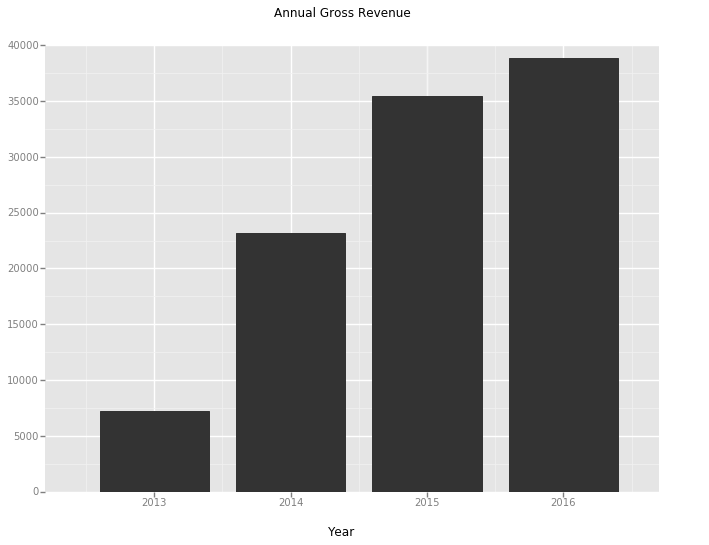

<ggplot: (21035110)>

In [133]:
#INSERT YEARLY BAR HERE #
rev_yr = ggplot(aes(x="Year",weight="Amount"), data = yr_revenue)
rev_yr = rev_yr + geom_bar() + scale_x_discrete(labels = ['2013','2014','2015','2016'])
rev_yr = rev_yr + ggtitle("Annual Gross Revenue")
rev_yr

#ggsave(rev_yr, filename = 'revenue_per_year.png')

Shown below is a graph of the number of participating members overtime. Strong growth amongst unique member participation is an indicator for program success, coupled with competitive click through rates, this becomes an attractive advertising option for our members.


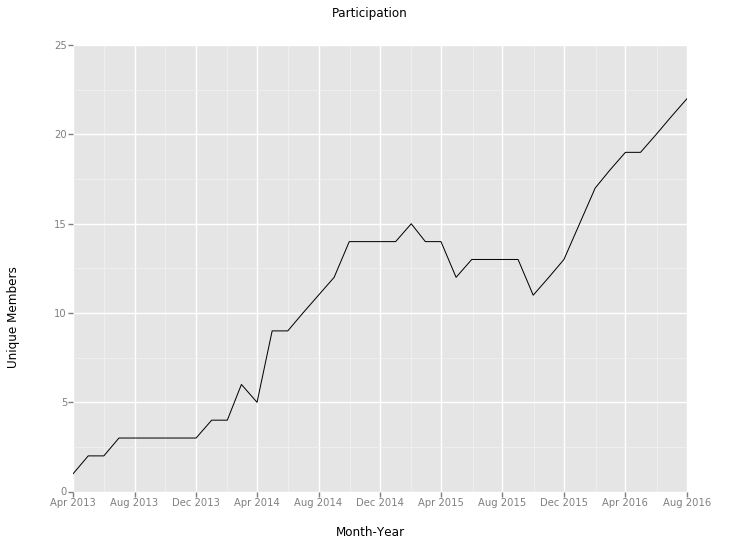

<ggplot: (23539860)>

In [134]:
#MEMBERS OVER TIME HERE#
rev_um = ggplot(aes(x='Month-Year', y = 'Unique Members'), data = full_u_r)
rev_um = rev_um + geom_line() + ggtitle("Participation")
rev_um


Our top three spenders for three years of operation are shown below. You can see overtime how the participating members are becoming some of the larger members in our group. These types of advertising options are going to be utilized more heavily by members who have larger marketing budgets. The offerings which cost the most and have the best click through rates are being consumed by the larger members. This may go without saying, but is still evident in the data.

In [135]:
#INSERT TOP SPENDERS HERE#
# Table of Top 3 Spenders Per Year
print "\nTop 3 Spenders Per Year:"
ts_v3


Top 3 Spenders Per Year:


,Member,Year,Spent
0,Portola Hotel & Spa,2016,5600.0
1,Monterey Zoo (Previously Wild Things),2016,3300.0
2,Monterey Peninsula Inn,2016,2700.0
32,Carmel Mission Inn,2015,6600.0
33,Monterey Zoo (Previously Wild Things),2015,3300.0
34,Hilton Garden Inn,2015,2250.0
58,Downtown Dining,2014,2840.0
59,Flaherty's Oyster Bar & Seafood Grill,2014,2750.0
60,Embassy Suites Monterey Bay-Seaside,2014,2280.0
75,Taste Morgan,2013,3200.0


The number of contract months appears to be leveling off after initial growth, even though this year has yet to be concluded, it is unlikely we will see the 40% growth we experienced between 2014-2015. 

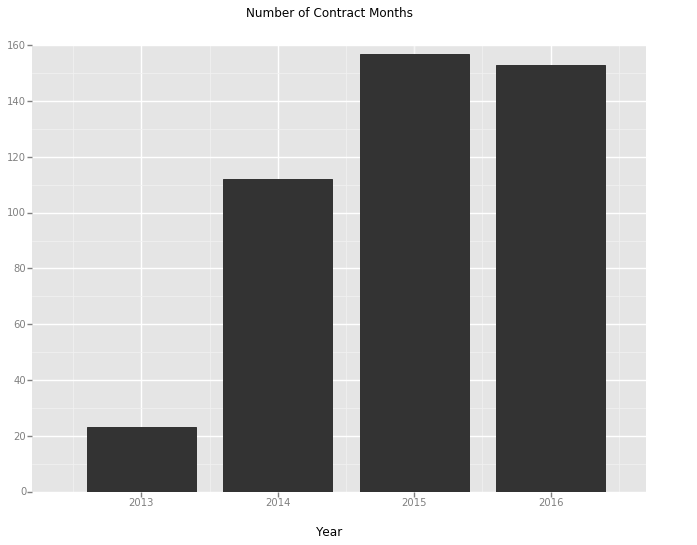

<ggplot: (23743615)>

In [136]:
#INSERT CONTRACT MONTHS HERE#
cm_py = ggplot(aes(x = 'Year', weight='Month'), data = ct_v2)
cm_py = cm_py + geom_bar() + ggtitle("Number of Contract Months")
cm_py

## Context - Ad Performance

In terms of advertising performance, in 2015 21.6 million impressions were delivered across 7 different methods of exposure. Alongside 57,000 clicks means the click through rate for all mediums is .265%. Referring to the table below, our homepage sponsor and featured listing offerings had stronger click through rates, more than quadruple the average cross all mediums. Note the number of impressions is lower compared to text links. The text links are the cheapest form of advertisement and have the weakest CTR due to the sheer number of impressions delivered however, in terms of total clicks it is the second best medium to advertise with. 


In [137]:
print "\nAdvertisement Performance:"
ad_data


Advertisement Performance:


,Ad Unit Performance Summary,Impressions,Clicks,CTR,Avg. Monthly Impressions,Avg. Monthly Clicks,Avg. Monthly CTR
0,Header,19,1,5.26%,1,0,5.26%
1,Mobile Banner,"3,401,372","11,754",0.35%,"261,644",904,0.35%
2,Page Sponsors,"178,424","1,530",0.86%,"13,725",118,0.86%
3,Homepage Sponsor,"250,836","4,761",1.90%,"19,295",366,1.90%
4,Featured Listing,"1,969,800","19,935",1.01%,"151,523","1,533",1.01%
5,ROS Banner,"2,818,636","3,486",0.12%,"216,818",268,0.12%
6,Text Links,"12,998,442","15,861",0.12%,"999,880","1,220",0.12%


This analysis should follow up with 2016 comparison on advertising performance. Future analysis should also keep a close eye towards which members are paying for what from the media kit and monitoring retention among members. Answering deeper questions such as click through rates of featured vs non-featured members, would make the value add of the program easier to judge. Assembling the data for that type of experiment is non-trivial and will take more than a week.

## Other DMOs

MCCVB reached out to seven of our partner DMOs to get a better understanding of current practices and member structures. Our results follow:

 - Visit San Jose does offer paid advertisements on their website, but they are not membership based and do not require membership dues. 
 - Visit San Luis Obispo does not currently offer supplemental online advertising, however anticipates it will be able to offer it in the near future.
 - Visit Santa Barabara does offer supplemental online advertising in conjunction with membership dues. 
 - SF Travel offers both supplemental online advertising and membership dues, among more offerings. 
 - Visit Ventura offers supplemental online advertising in conjunction with membership dues.

Without more data, we will not be able to further analyze DMO patterns. However, I believe it is reasonable for the reader to note that the size of the DMO will largely indicate the amount of offerings for a member. SF Travel has many packages and opportunities for different levels of engagement depending on the member. And that is the key... the diversity, or homogeniety, of the members and the size of the destination will likely determine the type, complexity, and cost of offerings.


## POV

Members:
    I would like for the tax dollar to go toward driving the tourist to the destination. When they arrive at this destination, I want them consuming what I have to offer. I want the opportunity to advertise, but I have to compete with other people who have consumables similar to mine. 
    It's difficult to compete with larger competitors as they often have budgets that surpass mine. However, if we aren't exploring and keeping all of our advertising options open, we may both lose out on consumption that might not have taken place if the advertising did not exist.


MCCVB:
    Providing the ability to advertise for our members is key, keeping our options numerous and varying we can server a greater number of our members. We understand the needs and nuances of members who have several hundred rooms and the members who have several tables at their smaller restaurant. 
    Keeping the larger members satisfied is important. Utilizing the advertising space is effective for these members, but perhaps as a public entity we could lower the cost of advertising or increase exposure by giving back the money or  purchasing additional advertising.
    

Stakeholder:
    Our public entities are not meant to turn a profit. Any excess money or profit should be directed towards bettering our members. If reducing competition and providing more opportunities for those less competitive is bettering our members, then we should consider alternatives. Such as a lottery system or refunding the money or purchasing additional advertising
   
   
   
## Testimonials

"We saw the value in leveraging DTN dollars and SEO ranking to expose our brand to those who otherwise may never have heard of us. It has been worth every penny!"
 
"The team was smart, easier to work with and made sure we were getting the most for our money"
 
"When I googled Things to Do in Monterey, See Monterey kept showing up, that's when I knew we needed them as a partner."


    